# Overview
## Dataset Description

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

|Variable|Definition|Key |
| --------- | ---------- | ------- |
|survival 	|Survival 	|0 = No, 1 = Yes|
|pclass 	|Ticket class 	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex 	|Sex 	||
|Age 	|Age in years || 	
|sibsp 	|# of siblings / spouses aboard the Titanic 	||
|parch 	|# of parents / children aboard the Titanic ||	
|ticket 	|Ticket number 	||
|fare 	|Passenger fare ||	
|cabin 	|Cabin number ||	
|embarked 	|Port of Embarkation 	|C = Cherbourg, Q = Queenstown, S = Southampton


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("./train.csv", index_col = 'PassengerId')
test_data = pd.read_csv("./test.csv", index_col = 'PassengerId')

display(train_data.head(), test_data.head(), train_data.info(), test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    f

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


None

None

# Pre-Processing

In [3]:
# Encoding sex
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Encoding embark point
#train_data['Embarked'] = train_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
#test_data['Embarked'] = test_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

In [17]:
# Column for the first letter of the Cabin
#train_data['primary_cabin'] = train_data['Cabin'].fillna('U').astype(str).str[0]

train_data['primary_cabin'] = train_data['Cabin'].astype(str).str[0]
test_data['primary_cabin'] = test_data['Cabin'].astype(str).str[0]

#train_data['primary_cabin'].value_counts()

train_data['no_logged_cabin'] = train_data['Cabin'].isnull()
test_data['no_logged_cabin'] = test_data['Cabin'].isnull()

In [5]:
train_data['name_length'] = [len(name) for name in train_data['Name']]
test_data['name_length'] = [len(name) for name in test_data['Name']]
# Total Family does not correlate at all with survival
train_data['family'] = train_data['SibSp'] + train_data['Parch']
test_data['family'] = test_data['SibSp'] + test_data['Parch']
#print(train_data['family'])

# Exploratory Data Analysis

In [6]:
#numerical_cols = [cname for cname in test_data.columns if test_data[cname].dtype in ['int64', 'float64']]
#categorical_cols = [cname for cname in test_data.columns if test_data[cname].dtype in ['object'] and test_data[cname].nunique() < 10]

numerical_cols = ['Age',  'Fare', 'name_length']
categorical_cols = ['Pclass', 'Embarked', 'primary_cabin', 'Sex', 'SibSp', 'Parch',  'family']

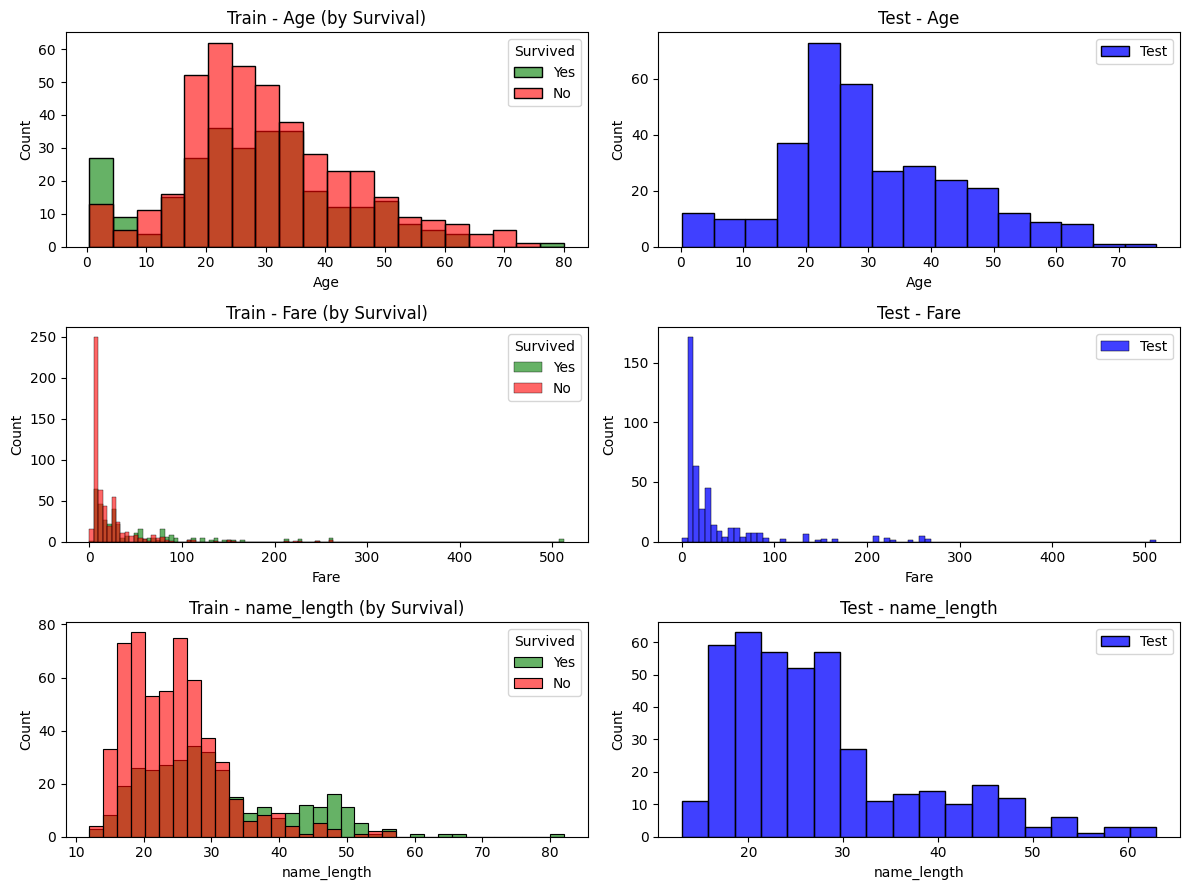

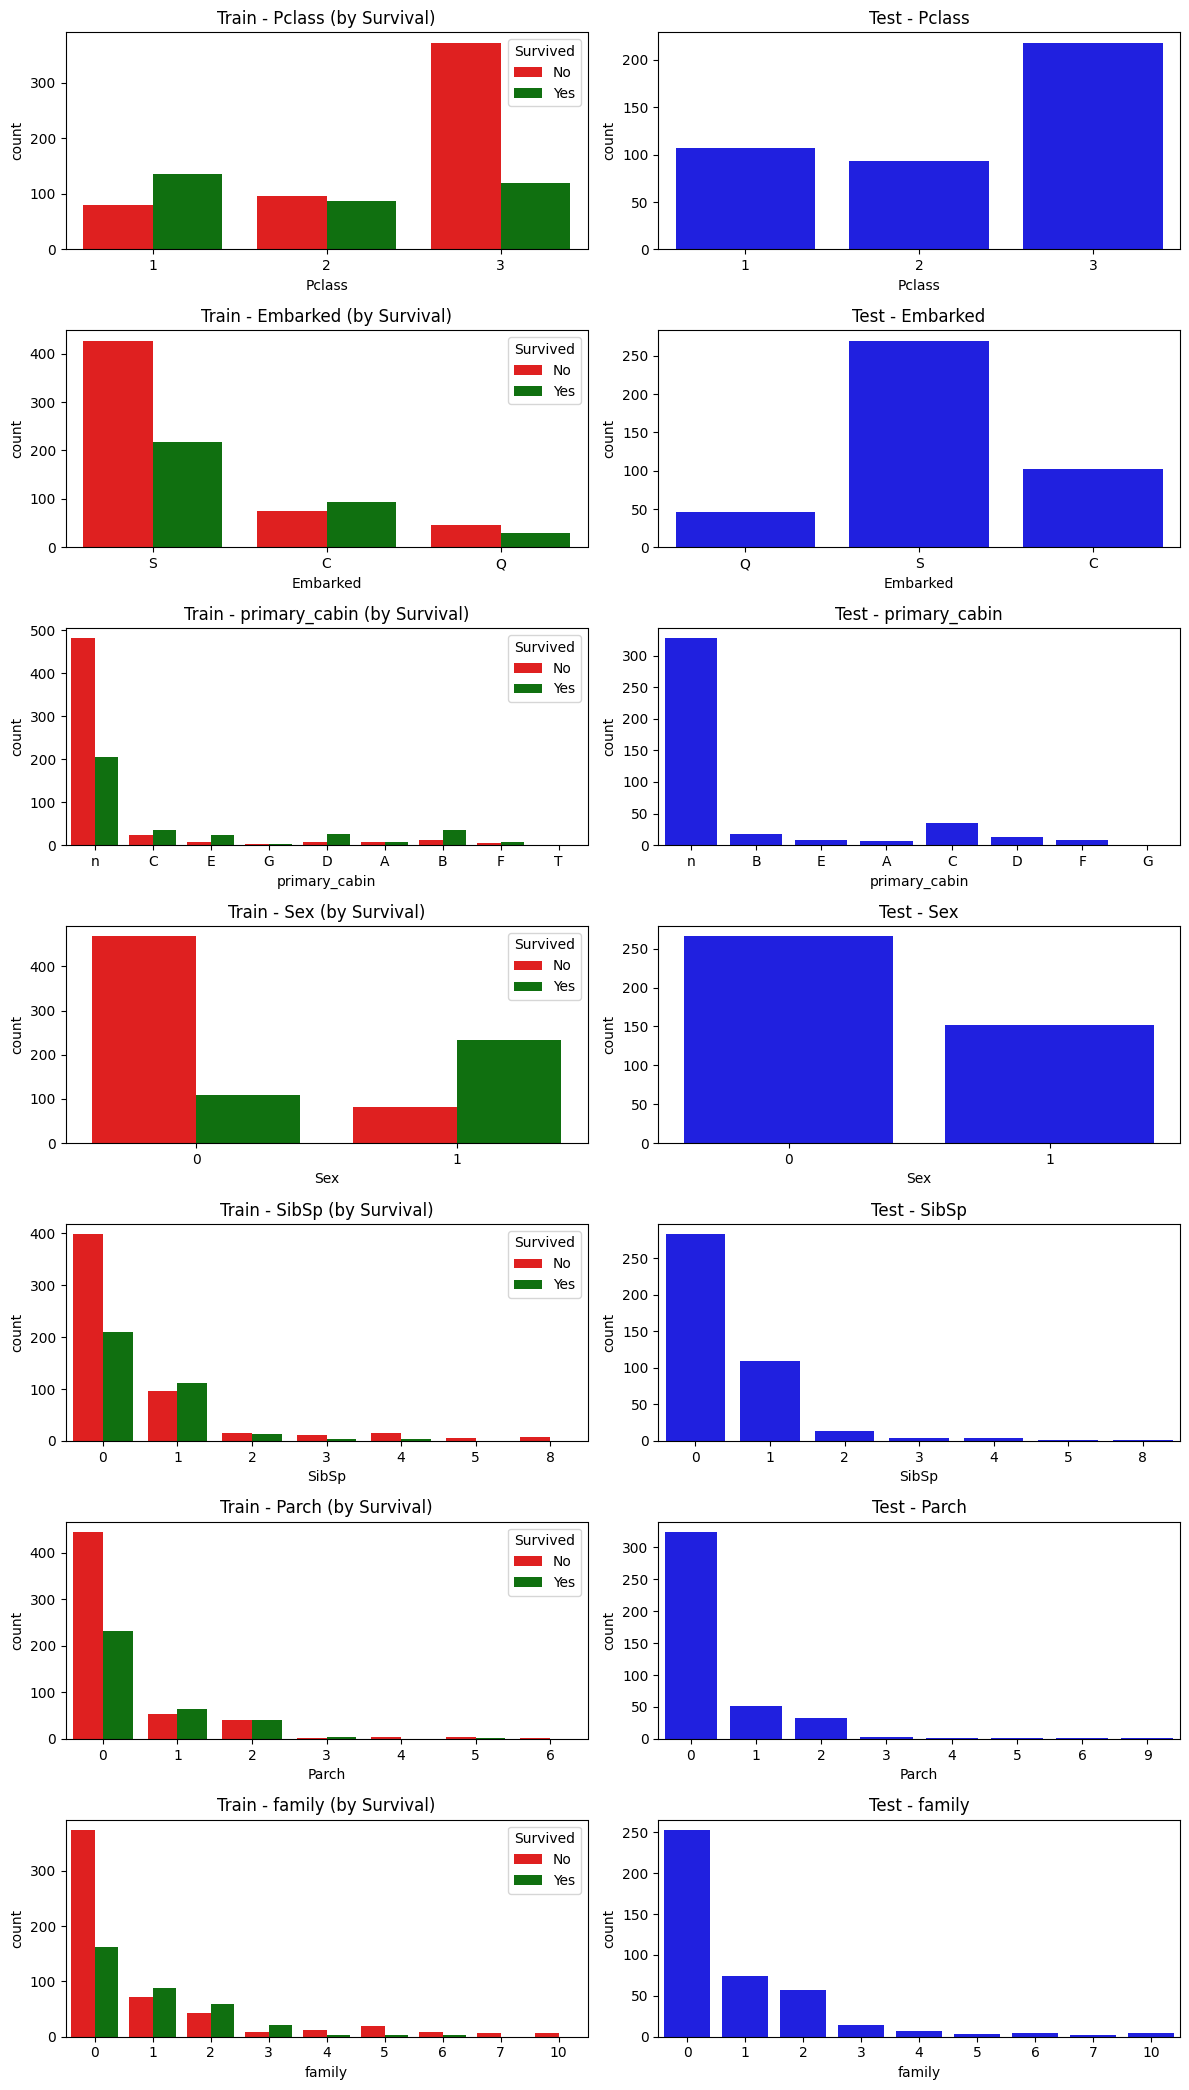

In [7]:
def plot_numerical_distributions(train_data, test_data, features):
    """
    Plots side-by-side distribution histograms for specified features in train_data and test_data.
    
    Parameters:
    - train_data: Pandas DataFrame containing training data.
    - test_data: Pandas DataFrame containing test data.
    - features: List of feature names to plot.
    - bins: Number of bins for histograms (default: 30).
    """
    num_features = len(features)
    plt.figure(figsize=(12, num_features * 3))  # Adjust figure size dynamically

    for i, feature in enumerate(features):
        plt.subplot(num_features, 2, 2 * i + 1)
        sns.histplot(data=train_data, x=feature, hue="Survived", palette={0: "red", 1: "green"}, alpha=0.6)
        plt.title(f'Train - {feature} (by Survival)')
        plt.legend(title="Survived", labels=["Yes", "No"])

        plt.subplot(num_features, 2, 2 * i + 2)
        sns.histplot(test_data[feature].dropna(), color='blue', label="Test")
        plt.title(f'Test - {feature}')
        plt.legend()

    plt.tight_layout()
    plt.show()

def plot_categorical_distributions(train_data, test_data, categorical_features):
    """
    Plots side-by-side count plots for categorical features.
    - Train data is split by survival status (hue="Survived").
    - Test data is plotted as a single count distribution.

    Parameters:
    - train_data: Pandas DataFrame containing training data.
    - test_data: Pandas DataFrame containing test data.
    - categorical_features: List of categorical feature names to plot.
    """
    num_features = len(categorical_features)
    plt.figure(figsize=(12, num_features * 3))  # Adjust figure size dynamically

    for i, feature in enumerate(categorical_features):
        plt.subplot(num_features, 2, 2 * i + 1)
        sns.countplot(data=train_data, x=feature, hue="Survived", palette={0: "red", 1: "green"})
        plt.title(f'Train - {feature} (by Survival)')
        plt.legend(title="Survived", labels=["No", "Yes"])

        plt.subplot(num_features, 2, 2 * i + 2)
        sns.countplot(data=test_data, x=feature, color='blue')
        plt.title(f'Test - {feature}')

    plt.tight_layout()
    plt.show()

plot_numerical_distributions(train_data, test_data, numerical_cols)
plot_categorical_distributions(train_data, test_data, categorical_cols)

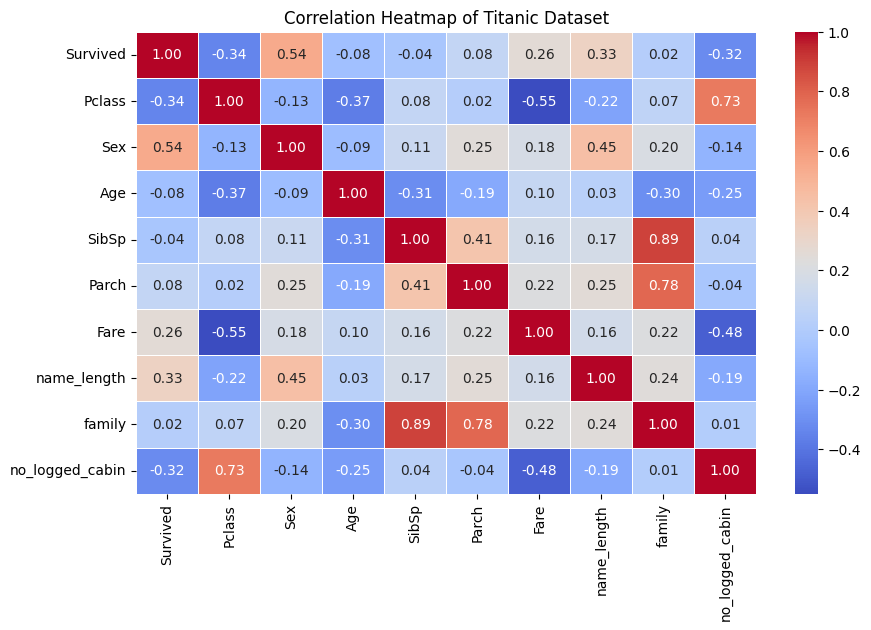

In [8]:
# Compute correlation matrix
corr_matrix = pd.get_dummies(train_data.drop(['Name', 'Ticket', 'Cabin', 'primary_cabin', 'Embarked'], axis=1)).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()


# Modeling

## LinearSVC

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

features = ['Age',  'Fare', 'name_length', 'Pclass', 'Embarked', 'primary_cabin', 'Sex', 'no_logged_cabin']
y = train_data["Survived"]
X = train_data[features]

numerical_features = ['Age',  'Fare', 'name_length']
categorical_features = ['Pclass', 'Embarked', 'primary_cabin', 'Sex', 'no_logged_cabin']

# Preprocessing for numeric data (Standardization)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
my_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(random_state=0))])

my_pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = my_pipeline.score(X_test, y_test)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8045


## XGBoost's XGBClassifier

In [10]:
from xgboost import XGBClassifier

# Define the full pipeline with XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=1500,
        learning_rate=0.01,
        random_state=0,
        use_label_encoder=False,
        objective='binary:logistic',
        eval_metric='logloss'  
    ))
])

xgb_pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = xgb_pipeline.score(X_test, y_test)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8324


In [11]:
# Cross Validation
from sklearn.model_selection import cross_val_score


linear_scores = cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='accuracy')

xgb_scores = cross_val_score(xgb_pipeline, X, y,
                              cv=5,
                              scoring='accuracy')

print("Average MAE score (Linear):", linear_scores.mean())
print("Average MAE score (XGBClassifier):", xgb_scores.mean())

Average MAE score (Linear): 0.7968740192078336
Average MAE score (XGBClassifier): 0.8215617349821104


In [18]:
preds = xgb_pipeline.predict(test_data)
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': preds})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Conclusion